In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("Titanic.pkl")
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,All,Transported_True
0,Europa,False,BP,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,FS,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,1
2,Europa,False,AS,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,0
3,Europa,False,AS,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,0
4,Earth,False,FS,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,1


In [4]:
cat = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
global_mean = df['Transported_True'].mean()
global_mean

0.5028089887640449

## Feature Importance 

### Risk Ratio
= global_mean/cateorical mean
i.e.

* we the mean of unique vaues in categorical variables
* if it is higher than one then that feature is really importance
* if it is lower than one then that feature is not importance 


In [6]:
df['VIP'].unique

array([False, True], dtype=object)

In [7]:
df[df.VIP == True]['Transported_True'].mean()

0.3780487804878049

In [10]:
data =[]
for columns in cat:
    for unique in df[columns].unique():
        mean = df[df[columns]== unique]['Transported_True'].mean()
        risk = mean/global_mean
        data.append([columns,unique,mean,risk])

In [14]:
check = pd.DataFrame(data=data,columns=['Columns','unique_feature','mean','risk_ratio'])
check.head()

,Columns,unique_feature,mean,risk_ratio
0,HomePlanet,Europa,0.658095,1.308836
1,HomePlanet,Earth,0.425328,0.845904
2,HomePlanet,Mars,0.515390,1.025022
3,CryoSleep,False,0.332801,0.661884
4,CryoSleep,True,0.815966,1.622816


In [16]:
check.set_index(['Columns','unique_feature'])

mean  risk_ratio
Columns     unique_feature                      
HomePlanet  Europa          0.658095    1.308836
            Earth           0.425328    0.845904
            Mars            0.515390    1.025022
CryoSleep   False           0.332801    0.661884
            True            0.815966    1.622816
Cabin       BP              0.668942    1.330410
            FS              0.465181    0.925165
            AS              0.529412    1.052908
            FP              0.404951    0.805378
            GS              0.591675    1.176739
            GP              0.452475    0.899895
            ES              0.370166    0.736196
            DP              0.398010    0.791573
            CP              0.568773    1.131191
            DS              0.455556    0.906021
            CS              0.766667    1.524767
            BS              0.781609    1.554485
            AP              0.425532    0.846309
            EP              0.337278    0.670788
            TP              0.333333    0.662942
Destination TRAPPIST-1e     0.467108    0.928997
            PSO J318.5-22   0.504687    1.003736
            55 Cancri e     0.617892    1.228880
VIP         False           0.505909    1.006166
            True            0.378049    0.751874

In [19]:
### Top 10 importan  features
check.sort_values('risk_ratio',ascending=False)[:10]

,Columns,unique_feature,mean,risk_ratio
4,CryoSleep,True,0.815966,1.622816
16,Cabin,BS,0.781609,1.554485
15,Cabin,CS,0.766667,1.524767
5,Cabin,BP,0.668942,1.330410
0,HomePlanet,Europa,0.658095,1.308836
22,Destination,55 Cancri e,0.617892,1.228880
9,Cabin,GS,0.591675,1.176739
13,Cabin,CP,0.568773,1.131191
7,Cabin,AS,0.529412,1.052908
2,HomePlanet,Mars,0.515390,1.025022


Those who were in Cryo sleep and Cabin BS had a hicger chance of being abducted 

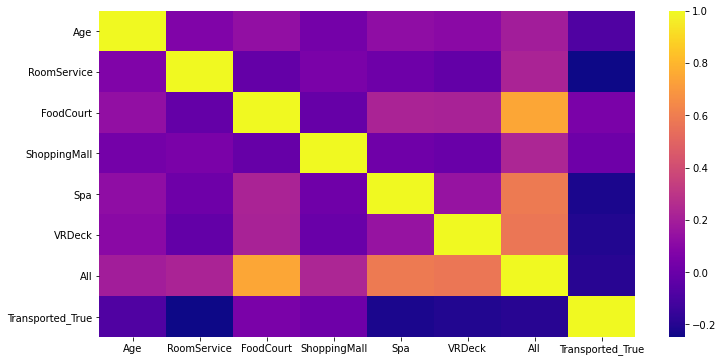

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma')

###  Mutual information
* measure the degree of dependency between a categorical variable and the target variable

In [24]:
from sklearn.metrics import mutual_info_score as MIS

In [27]:
MIS(df['HomePlanet'],df['Transported_True'])

0.01899666773434558

In [29]:
data_2 = []
for i in cat:
    score = MIS(df[i],df['Transported_True'])
    data_2.append([i,score])

In [30]:
check_2 = pd.DataFrame(data=data_2,columns=['Columns','Feature_importance'])
check_2.head()

,Columns,Feature_importance
0,HomePlanet,0.018997
1,CryoSleep,0.112824
2,Cabin,0.030935
3,Destination,0.007469
4,VIP,0.000781


In [33]:
check_2.sort_values('Feature_importance',ascending=False)

,Columns,Feature_importance
1,CryoSleep,0.112824
2,Cabin,0.030935
0,HomePlanet,0.018997
3,Destination,0.007469
4,VIP,0.000781


These are the top 5 most important features for our model

## Encoding Categorical Variables


In [35]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,All,Transported_True
0,Europa,False,BP,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,FS,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,1
2,Europa,False,AS,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,0
3,Europa,False,AS,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,0
4,Earth,False,FS,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,1


In [36]:
new_df = pd.get_dummies(data=df,columns=cat,drop_first=True)

In [37]:
new_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,All,Transported_True,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_EP,Cabin_ES,Cabin_FP,Cabin_FS,Cabin_GP,Cabin_GS,Cabin_TP,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,8536.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1873.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,4637.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Training Models 

In [140]:
X = new_df.drop('Transported_True',axis=1)
y = new_df['Transported_True']

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3)

## Logistics Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [99]:
logReg = LogisticRegression(max_iter=10000,C=5).fit(X_train,y_train)


In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
## Train data
predict = logReg.predict(X_train)
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2369
           1       0.78      0.83      0.81      2365

    accuracy                           0.80      4734
   macro avg       0.80      0.80      0.80      4734
weighted avg       0.80      0.80      0.80      4734

[[1809  560]
 [ 392 1973]]


In [102]:
## test data
predict = logReg.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       994
           1       0.79      0.86      0.82      1036

    accuracy                           0.81      2030
   macro avg       0.81      0.81      0.81      2030
weighted avg       0.81      0.81      0.81      2030

[[757 237]
 [150 886]]


## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators =160,max_depth=10,min_samples_leaf=4).fit(X_train,y_train)

In [97]:
predict = forest.predict(X_train)
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2369
           1       0.84      0.86      0.85      2365

    accuracy                           0.85      4734
   macro avg       0.85      0.85      0.85      4734
weighted avg       0.85      0.85      0.85      4734

[[1972  397]
 [ 326 2039]]


In [98]:
## test data
predict = forest.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       994
           1       0.80      0.81      0.80      1036

    accuracy                           0.80      2030
   macro avg       0.80      0.80      0.80      2030
weighted avg       0.80      0.80      0.80      2030

[[778 216]
 [194 842]]


In [119]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [142]:
#param_grid = {'C':[1,10,50,100,1000],'gamma':[0.1,0.01,0.001,0.0001]}
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('svm',SVC())
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC())])

In [143]:
predict = pipe.predict(X_train)
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2356
           1       0.81      0.83      0.82      2378

    accuracy                           0.82      4734
   macro avg       0.82      0.82      0.82      4734
weighted avg       0.82      0.82      0.82      4734

[[1902  454]
 [ 407 1971]]


In [144]:
## test data
predict = pipe.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1007
           1       0.80      0.81      0.80      1023

    accuracy                           0.80      2030
   macro avg       0.80      0.80      0.80      2030
weighted avg       0.80      0.80      0.80      2030

[[796 211]
 [199 824]]


## try somethng different 

In [111]:
check.head()

,Columns,unique_feature,mean,risk_ratio
0,HomePlanet,Europa,0.658095,1.308836
1,HomePlanet,Earth,0.425328,0.845904
2,HomePlanet,Mars,0.515390,1.025022
3,CryoSleep,False,0.332801,0.661884
4,CryoSleep,True,0.815966,1.622816


In [134]:
check_2.sort_values('Feature_importance').tail()

,Columns,Feature_importance
4,VIP,0.000781
3,Destination,0.007469
0,HomePlanet,0.018997
2,Cabin,0.030935
1,CryoSleep,0.112824


In [131]:
num = [i for i in df.columns if df[i].dtypes=='float64']
num

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'All']

In [135]:
X = df[num]
y = new_df['Transported_True']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3)

In [136]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC())])

In [138]:
predict = pipe.predict(X_train)
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2322
           1       0.75      0.88      0.81      2412

    accuracy                           0.79      4734
   macro avg       0.80      0.79      0.79      4734
weighted avg       0.80      0.79      0.79      4734

[[1629  693]
 [ 284 2128]]


In [139]:
## test data
predict = pipe.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1041
           1       0.74      0.87      0.80       989

    accuracy                           0.79      2030
   macro avg       0.80      0.79      0.79      2030
weighted avg       0.80      0.79      0.79      2030

[[738 303]
 [126 863]]


...